In [1]:
import pandas as pd
import plotly
import plotly.graph_objs as go
pop_df = pd.read_csv(r'C:/Users/minhcq/Downloads/dataset/population.csv')
births_df = pd.read_csv(r'C:/Users/minhcq/Downloads/dataset/births.csv')
deaths_df = pd.read_csv(r'C:/Users/minhcq/Downloads/dataset/deaths.csv')
sex_im_df = pd.read_csv(r'C:/Users/minhcq/Downloads/dataset/immigrants_emigrants_by_sex.csv')
des_im_df = pd.read_csv(r'C:/Users/minhcq/Downloads/dataset/immigrants_emigrants_by_destination.csv')
colors = ["#006D2C", "#31A354","#74C476"]

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
pop_df

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124
5,2017,2,Eixample,6,la Sagrada Família,Male,0-4,191
6,2017,2,Eixample,7,la Dreta de l'Eixample,Male,0-4,176
7,2017,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Male,0-4,158
8,2017,2,Eixample,9,la Nova Esquerra de l'Eixample,Male,0-4,220
9,2017,2,Eixample,10,Sant Antoni,Male,0-4,143


In [4]:
pop_df.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [5]:
year_df = pop_df.pivot_table(index='Year',columns='Gender',values='Number',aggfunc='sum')
year_df

Gender,Female,Male
Year,,
2013,848121,763701
2014,844070,758316
2015,845035,759520
2016,847259,761487
2017,854184,766625


In [6]:
year_df.plot.bar(stacked=True,color=colors)

In [7]:
age_df=pop_df[pop_df['Year']==2017].pivot_table(index='Age',columns='Gender',values='Number',aggfunc='sum')
age_df

Gender,Female,Male
Age,,
0-4,33328,35074
10-14,33064,34511
15-19,31950,34003
20-24,39630,39432
25-29,55123,51366
30-34,62054,60299
35-39,66464,68111
40-44,66033,67524
45-49,59644,58688


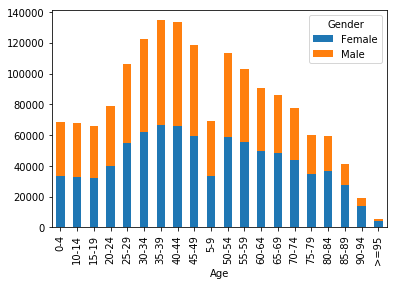

In [8]:
age_df.plot.bar(stacked=True)

In [9]:
#list(age_df.index)
#data = go.bar(y=list(age_df.index),x=list(age_df['Female'])
layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       title='Number'),
                   barmode='overlay',
                   bargap=0.1)

data = [go.Bar(y=list(age_df.index),
               x=list(age_df['Female']),
               orientation='h',
               name='Female',
               hoverinfo='x',
               marker=dict(color='powderblue')
               ),
        go.Bar(y=list(age_df.index),
               x=-1 * age_df['Male'].astype('int'),
               orientation='h',
               name='Male',
               hoverinfo='text',
               marker=dict(color='seagreen')
               )]

iplot(dict(data=data, layout=layout)) 

In [10]:
district_df=pop_df[pop_df['Year']==2017].pivot_table(index='District.Name',columns='Gender',values='Number',aggfunc='sum',margins=True)[:-1].sort_values(by='All')
district_df

Gender,Female,Male,All
District.Name,,,
Les Corts,43820,38213,82033
Ciutat Vella,48467,52920,101387
Gràcia,65793,55554,121347
Sant Andreu,77571,70023,147594
Sarrià-Sant Gervasi,80877,68402,149279
Nou Barris,88348,78231,166579
Horta-Guinardó,89485,79266,168751
Sants-Montjuïc,95006,86904,181910
Sant Martí,122263,113250,235513


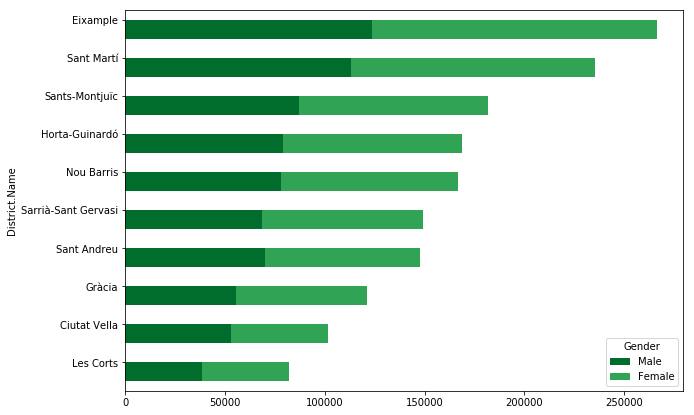

In [11]:
district_df.loc[:, lambda df: ['Male', 'Female']].plot.barh(stacked=True,color=colors, figsize=(10,7),legend=True,position=1,sort_columns=True)

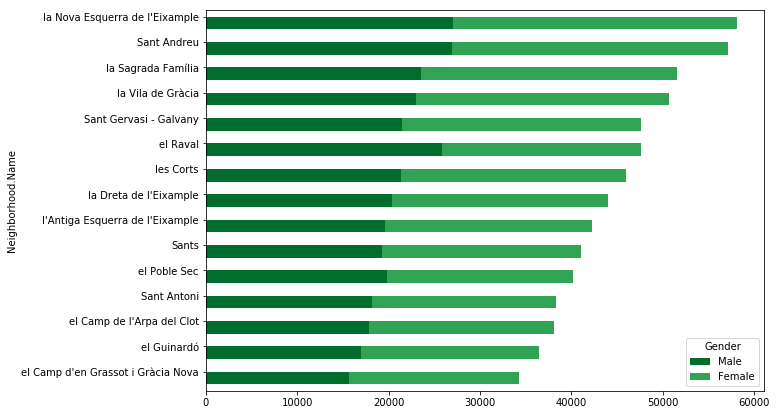

In [12]:
Neibor_df=pop_df[pop_df['Year']==2017].pivot_table(index='Neighborhood.Name',columns='Gender',values='Number',aggfunc='sum',margins=True)[:-1].sort_values(by='All')[-15:]
Neibor_df.loc[:, lambda df: ['Male', 'Female']].plot.barh(stacked=True,color=colors, figsize=(10,7),legend=True,position=1,sort_columns=True)


In [24]:
import numpy as np
df = pd.DataFrame(np.random.rand(10, 2), columns=['Col1', 'Col2'])

In [31]:
cf=df.copy()

In [27]:
df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'])

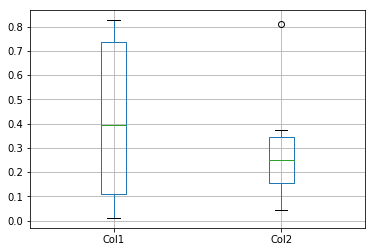

In [32]:
df.boxplot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA98BB00B8>,
      dtype=object)

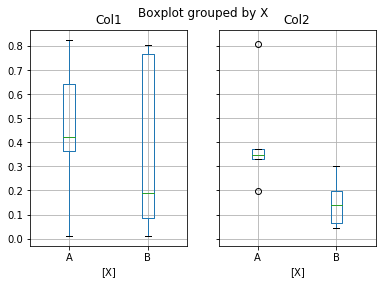

In [30]:
df.boxplot(by='X')